In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
import pandas as pd
import os

# CSV 파일이 저장된 디렉토리
directory = '/Users/anchanghun/Downloads/AI_Study/dataset/CIC-IDS-2017/MachineLearningCVE'

# 통합할 모든 CSV 파일 목록을 가져옴
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# 각 CSV 파일을 읽고 DataFrame으로 로드한 후 리스트에 추가
dfs = []
for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path, encoding='utf-8')
    dfs.append(df)

# DataFrame을 연결하여 통합
combined_df = pd.concat(dfs, ignore_index=True)

# 통합된 DataFrame을 하나의 CSV 파일로 저장
combined_df.to_csv('/Users/anchanghun/Downloads/AI_Study/dataset/CIC-IDS-2017/MachineLearningCVE/combISCX.csv', index=False)


In [4]:
directory = '/Users/anchanghun/Downloads/AI_Study/dataset/CIC-IDS-2017/TrafficLabelling '

# 통합할 모든 CSV 파일 목록을 가져옴
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# 각 CSV 파일을 읽고 DataFrame으로 로드한 후 리스트에 추가
dfs = []
for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path, encoding='latin1')
    dfs.append(df)

# DataFrame을 연결하여 통합
label_df = pd.concat(dfs, ignore_index=True)

# 통합된 DataFrame을 하나의 CSV 파일로 저장
label_df.to_csv('/Users/anchanghun/Downloads/AI_Study/dataset/CIC-IDS-2017/TrafficLabelling /labelISCX.csv', index=False)


/var/folders/lt/dt43ws7s4_z4rrsjwvzmwz740000gn/T/ipykernel_15612/2993114177.py:10: DtypeWarning: Columns (0,1,3,6,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin1')


In [5]:
combined_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


In [6]:
combined_df[" Label"].value_counts().sum()

5661486

In [7]:
combined_df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [8]:
null_columns = combined_df.columns[combined_df.isnull().any()].tolist()
print(null_columns)

['Flow Bytes/s']


In [9]:
combined_df["Flow Bytes/s"].isnull().sum()

2716

In [10]:
combined_df["Flow Bytes/s"].value_counts()

Flow Bytes/s
0.000000e+00    711534
4.000000e+06     49982
1.333333e+06     20192
3.000000e+06     19364
8.333333e+04     17768
                 ...  
5.566412e+00         2
3.029639e+03         2
3.365759e+05         2
1.498628e+03         2
6.747159e+03         2
Name: count, Length: 1593908, dtype: int64

In [11]:
combined_df["Flow Bytes/s"] = combined_df["Flow Bytes/s"].fillna(combined_df["Flow Bytes/s"].mean())

In [12]:
combined_df["Flow Bytes/s"].isnull().sum()

0

In [13]:
for column in combined_df.columns:
    if combined_df[column].dtype != 'int64':
        if column != " Label":
            combined_df[column]= combined_df[column].astype(np.float64)
for column in combined_df.columns:
    if combined_df[column].dtype == np.float64:
        combined_df[column] = tf.convert_to_tensor(combined_df[column].values, dtype=tf.float64)


In [14]:
combined_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


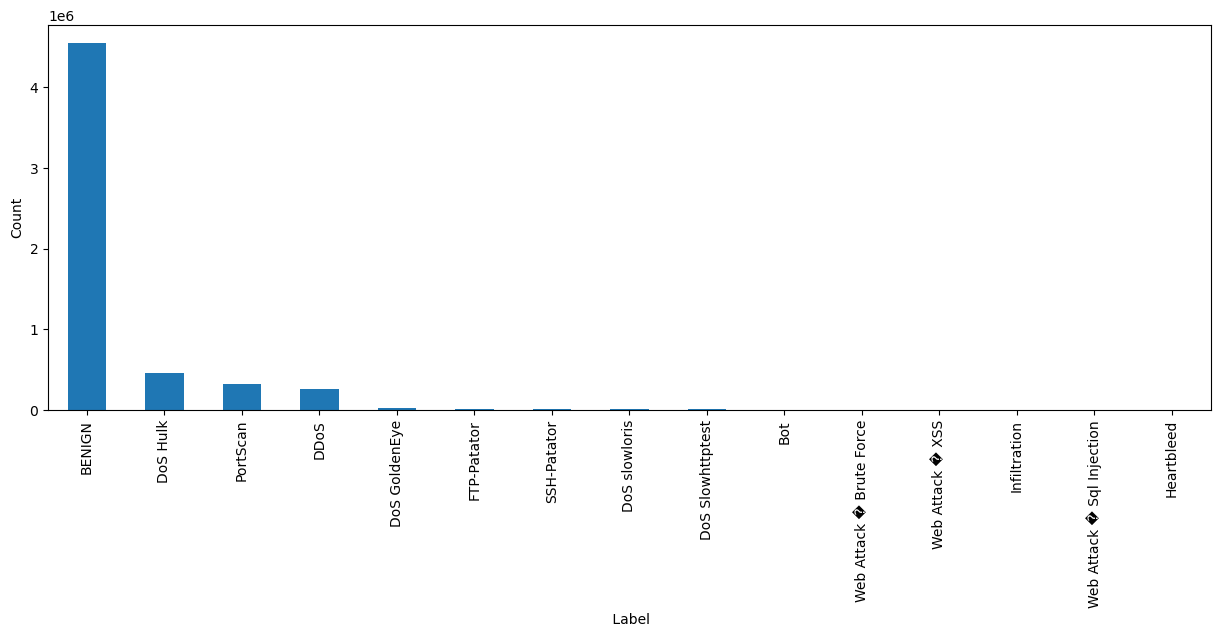

In [15]:
plt.figure(figsize=(15, 5))

plt.xlabel('Label')
plt.ylabel('Count')
combined_df[' Label'].value_counts().plot(kind='bar',)
plt.show()


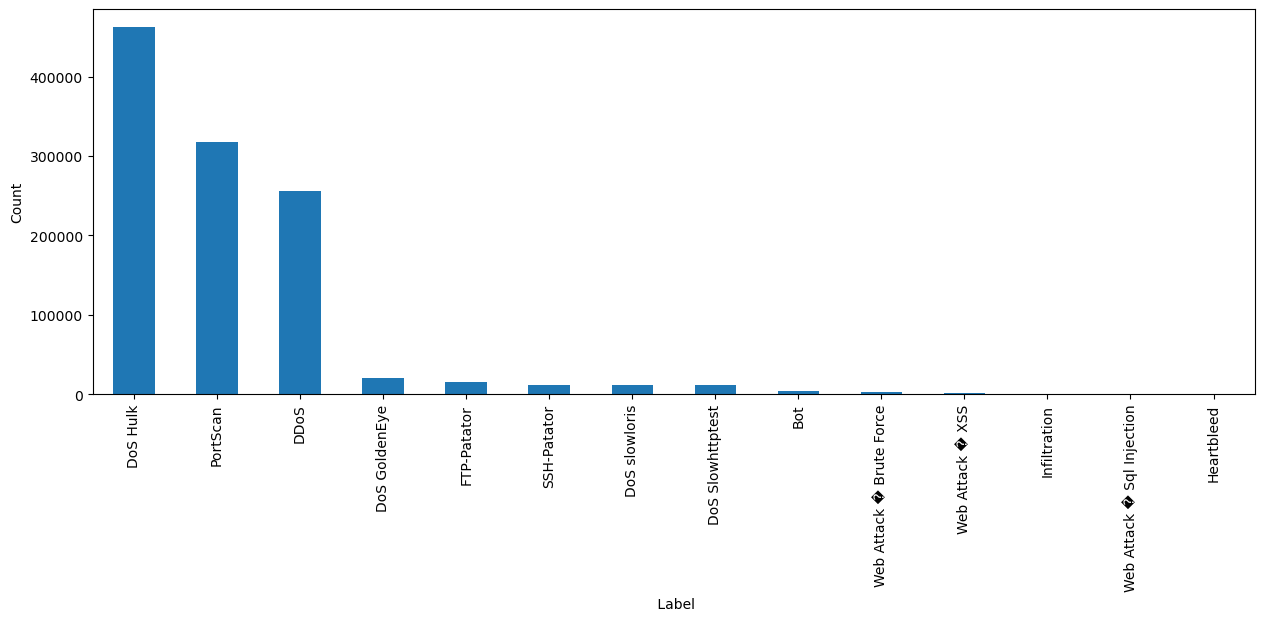

In [16]:
#BENIGN 값제외
plt.figure(figsize=(15, 5))

plt.xlabel('Label')
plt.ylabel('Count')
plt_df = combined_df[combined_df[' Label'] != 'BENIGN']
plt_df[' Label'].value_counts().plot(kind='bar',)
plt.show()


 CNN, LSTM, GRU

In [17]:
X=combined_df.drop(' Label',axis=1)
X.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,22,166,1,1,0,0,0,0,0.0,0.0,...,0,32,0.000,0.000,0,0,0.0,0.000,0,0
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,0,32,0.000,0.000,0,0,0.0,0.000,0,0
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,0,40,0.000,0.000,0,0,0.0,0.000,0,0
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,0,32,0.000,0.000,0,0,0.0,0.000,0,0
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287


In [18]:
y=combined_df[' Label']
y.value_counts()

 Label
BENIGN                        4546194
DoS Hulk                       462146
PortScan                       317860
DDoS                           256054
DoS GoldenEye                   20586
FTP-Patator                     15876
SSH-Patator                     11794
DoS slowloris                   11592
DoS Slowhttptest                10998
Bot                              3932
Web Attack � Brute Force         3014
Web Attack � XSS                 1304
Infiltration                       72
Web Attack � Sql Injection         42
Heartbleed                         22
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [20]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [21]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)   

(5095333, 5, 78) (5095333,)
(566145, 5, 78) (566145,)


In [22]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [23]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [24]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

In [25]:
input_layer = Input(shape=(n_timesteps,n_features))

conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer) 
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(2, activation = "sigmoid")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 78)]           0         
                                                                 
 conv1d (Conv1D)             (None, 3, 64)             15040     
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 64)                12352     
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 27522 (107.51 KB)
Trainable params: 27522 (107.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,  validation_split = 0.1)


In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))